<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(0)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,0.619996,131.584534,131.168199,0.416334
1,0.0,1.0,91.836721,66.187383,-2.406035,165.618069,167.938955,-2.320886
2,0.0,2.0,43.398567,38.309032,1.139236,92.846835,91.946816,0.900019
3,0.0,3.0,73.960630,22.781469,0.259126,107.001226,107.218103,-0.216878
4,0.0,4.0,98.540837,89.850536,-1.016980,197.374393,197.997339,-0.622946
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-0.591399,90.711973,91.600067,-0.888095
19996,999.0,16.0,73.135408,86.171748,-0.092377,169.214779,169.252234,-0.037456
19997,999.0,17.0,82.400084,40.066726,2.392244,134.859054,132.999406,1.859648
19998,999.0,18.0,65.243162,88.001906,1.696142,164.941210,163.106549,1.834661


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,0.619996,131.584534,131.168199,0.416334
1,0.0,1.0,91.836721,66.187383,-2.406035,165.618069,167.938955,-2.320886
2,0.0,2.0,43.398567,38.309032,1.139236,92.846835,91.946816,0.900019
3,0.0,3.0,73.960630,22.781469,0.259126,107.001226,107.218103,-0.216878
4,0.0,4.0,98.540837,89.850536,-1.016980,197.374393,197.997339,-0.622946
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-0.591399,90.711973,91.600067,-0.888095
19996,999.0,16.0,73.135408,86.171748,-0.092377,169.214779,169.252234,-0.037456
19997,999.0,17.0,82.400084,40.066726,2.392244,134.859054,132.999406,1.859648
19998,999.0,18.0,65.243162,88.001906,1.696142,164.941210,163.106549,1.834661


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    77.493350  43.471189  0.619996  131.584534  131.168199  0.416334
      1.0    91.836721  66.187383 -2.406035  165.618069  167.938955 -2.320886
      2.0    43.398567  38.309032  1.139236   92.846835   91.946816  0.900019
      3.0    73.960630  22.781469  0.259126  107.001226  107.218103 -0.216878
      4.0    98.540837  89.850536 -1.016980  197.374393  197.997339 -0.622946
...                ...        ...       ...         ...         ...       ...
999.0 15.0   46.138603  35.164769 -0.591399   90.711973   91.600067 -0.888095
      16.0   73.135408  86.171748 -0.092377  169.214779  169.252234 -0.037456
      17.0   82.400084  40.066726  2.392244  134.859054  132.999406  1.859648
      18.0   65.243162  88.001906  1.696142  164.941210  163.106549  1.834661
      19.0   73.974682  52.585818 -0.537206  136.023293  136.886224 -0.862930

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    77.493350  43.471189  0.619996  131.584534  131.168199  0.416334
      1.0    91.836721  66.187383 -2.406035  165.618069  167.938955 -2.320886
      2.0    43.398567  38.309032  1.139236   92.846835   91.946816  0.900019
      3.0    73.960630  22.781469  0.259126  107.001226  107.218103 -0.216878
      4.0    98.540837  89.850536 -1.016980  197.374393  197.997339 -0.622946
...                ...        ...       ...         ...         ...       ...
999.0 15.0   46.138603  35.164769 -0.591399   90.711973   91.600067 -0.888095
      16.0   73.135408  86.171748 -0.092377  169.214779  169.252234 -0.037456
      17.0   82.400084  40.066726  2.392244  134.859054  132.999406  1.859648
      18.0   65.243162  88.001906  1.696142  164.941210  163.106549  1.834661
      19.0   73.974682  52.585818 -0.537206  136.023293  136.886224 -0.862930

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,0.619996,131.584534,131.168199,0.416334
1,0.0,1.0,91.836721,66.187383,-2.406035,165.618069,167.938955,-2.320886
2,0.0,2.0,43.398567,38.309032,1.139236,92.846835,91.946816,0.900019
3,0.0,3.0,73.960630,22.781469,0.259126,107.001226,107.218103,-0.216878
4,0.0,4.0,98.540837,89.850536,-1.016980,197.374393,197.997339,-0.622946
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-0.591399,90.711973,91.600067,-0.888095
19996,999.0,16.0,73.135408,86.171748,-0.092377,169.214779,169.252234,-0.037456
19997,999.0,17.0,82.400084,40.066726,2.392244,134.859054,132.999406,1.859648
19998,999.0,18.0,65.243162,88.001906,1.696142,164.941210,163.106549,1.834661


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    77.493350  43.471189  0.619996  131.584534  131.168199  0.416334
      1.0    91.836721  66.187383 -2.406035  165.618069  167.938955 -2.320886
      2.0    43.398567  38.309032  1.139236   92.846835   91.946816  0.900019
      3.0    73.960630  22.781469  0.259126  107.001226  107.218103 -0.216878
      4.0    98.540837  89.850536 -1.016980  197.374393  197.997339 -0.622946
...                ...        ...       ...         ...         ...       ...
999.0 15.0   46.138603  35.164769 -0.591399   90.711973   91.600067 -0.888095
      16.0   73.135408  86.171748 -0.092377  169.214779  169.252234 -0.037456
      17.0   82.400084  40.066726  2.392244  134.859054  132.999406  1.859648
      18.0   65.243162  88.001906  1.696142  164.941210  163.106549  1.834661
      19.0   73.974682  52.585818 -0.537206  136.023293  136.886224 -0.862930

[20000 rows x 6 columns]

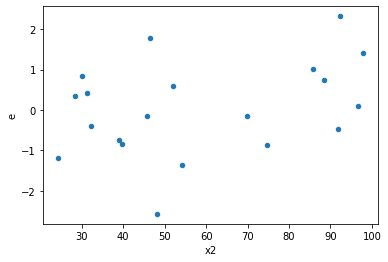

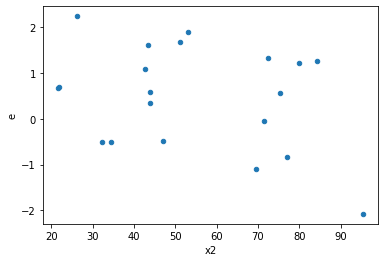

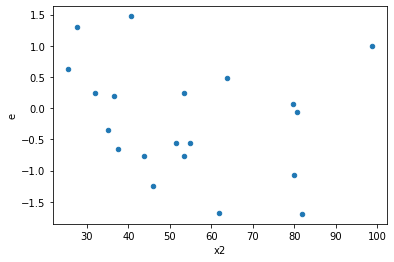

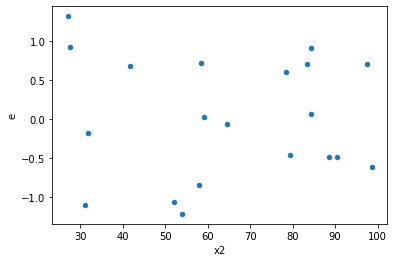

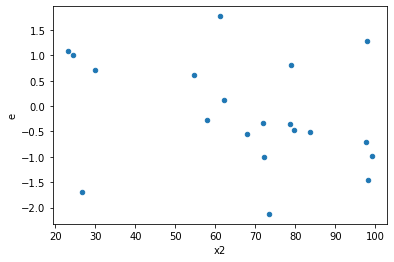

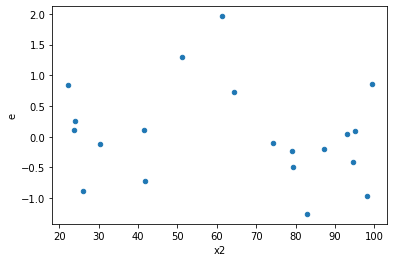

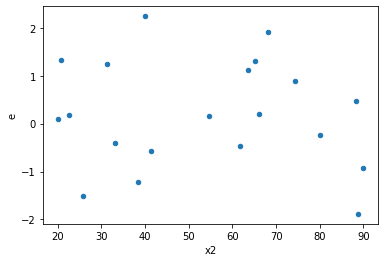

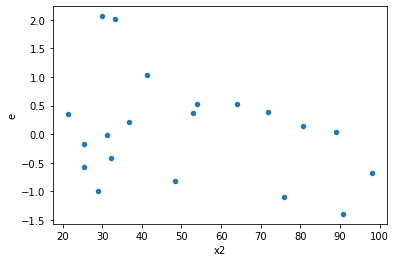

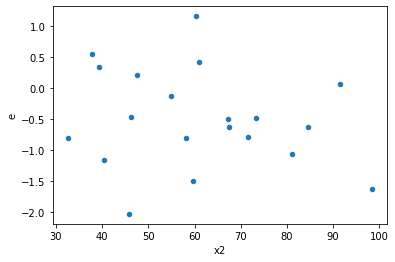

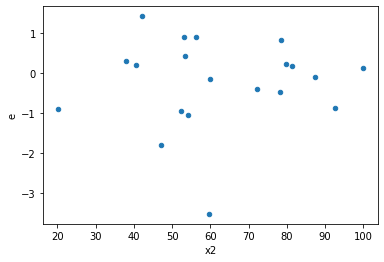

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,3.2499465871310513,6.1588042779524805,0.5416577645218419,1.0264673796587467,1.8950478455060626,0.456194859266122,0.771902570366939,0.228097429633061,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,5.814499626887248,6.063941300338108,0.9690832711478747,1.0106568833896847,1.042899937992497,0.9606374556887485,0.5196812721556258,0.48031872784437424,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,4.607847785681398,7.724011918505775,0.7679746309468997,1.2873353197509625,1.6762732359579378,0.5459849036316875,0.7270075481841562,0.27299245181584375,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,2.5880124980672576,3.8341547483418568,0.4313354163445429,0.6390257913903095,1.481505499376539,0.6452083002284308,0.6773958498857846,0.3226041501142154,Reject005=1 : Homoscedasticity
9.0,6.0,6.0,3.183595998185292,5.854587557911214,0.530599333030882,0.9757645929852022,1.8389857134034706,0.47731049324279406,0.761344753378603,0.23865524662139703,Reject005=1 : Homoscedasticity
10.0,6.0,6.0,3.255529025180135,5.727804214189387,0.5425881708633559,0.9546340356982311,1.7594081238063775,0.5094498860140342,0.7452750569929829,0.2547249430070171,Reject005=1 : Homoscedasticity
11.0,6.0,6.0,5.606813484428021,6.772852587655416,0.9344689140713368,1.128808764609236,1.2079682348032215,0.8244357529306332,0.5877821235346834,0.4122178764653166,Reject005=1 : Homoscedasticity
12.0,6.0,6.0,3.155663536507414,5.663740779909961,0.5259439227512357,0.9439567966516602,1.7947860139038794,0.49483529514340185,0.7525823524282991,0.24741764757170093,Reject005=1 : Homoscedasticity
23.0,6.0,6.0,4.577197081729784,5.3064346128922795,0.7628661802882973,0.8844057688153799,1.1593196705628648,0.8621593553219373,0.5689203223390313,0.43107967766096866,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,3.2499465871310513,6.1588042779524805,0.5416577645218419,1.0264673796587467,1.8950478455060626,0.456194859266122,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,5.814499626887248,6.063941300338108,0.9690832711478747,1.0106568833896847,1.042899937992497,0.9606374556887485,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,4.414055173114213,4.013442084602535,0.7356758621857021,0.6689070141004225,0.909241485935248,0.9110033859931478,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,4.607847785681398,7.724011918505775,0.7679746309468997,1.2873353197509625,1.6762732359579378,0.5459849036316875,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,3.0980281239349594,1.8445225201564646,0.5163380206558266,0.30742042002607745,0.595385983072886,0.5444690296389381,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,3.9520887783021474,2.9272728663486616,0.6586814630503579,0.48787881105811026,0.7406900579815021,0.7247868524564577,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,5.860853363344159,1.5342440072327133,0.9768088938906931,0.2557073345387855,0.26177826198969856,0.1276319160277091,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,2.5880124980672576,3.8341547483418568,0.4313354163445429,0.6390257913903095,1.481505499376539,0.6452083002284308,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,7.005108699214735,4.980982732717475,1.167518116535789,0.8301637887862459,0.7110500274286733,0.6893317261366751,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      927
Reject005=0 : Heteroscedasticity     73
Name: Result_test, dtype: int64